<a href="https://colab.research.google.com/github/IsabellaGarciaS/Biosignals/blob/main/P6_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head><p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='black'> <center>
       Bioseñales y Sistemas </center></font></h1>
<p3><center><b><font color='black' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>
</font>
<h2><font color='black'> <center>
Práctica 6 - Diseño de filtros digitales </center></font></h2>
<h3><font color='black'> <center>
Danna Isabella Garcia Saenz - Solanlly Evenedy Montoya Rivera </center></font></h3>
<font  face="Courier New" size="3">
<p1><center> </center></p1></head>

**4.1. Creación de la señal**
--

Proponga una secuencia sinusoidal 𝑥𝑒(𝑛), con 0≤𝑛≤1000, 𝐹0=0,01𝐻𝑧 y 𝐹𝑠=25𝐻𝑧. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética 𝑥𝑒(𝑛) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

𝑦𝑒(𝑛)=𝛼𝑥𝑒(𝑛−𝐷)+𝑤(𝑛)

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y 𝑤(𝑛) representa el ruido generado por la electrónica de los sistemas de adquisición.

**Genere las secuencias ficticias 𝑥𝑒(𝑛) y 𝑦𝑒(𝑛), implemente 𝑤(𝑛) como una secuencia de ruido Gaussiano con media cero y varianza 𝜎2=0,01, establezca 𝛼=0,8 y un retraso 𝐷=15 muestras. Grafique ambas señales.**

Nota: Para generar el ruido gaussiano use la función de numpy: np.random.normal.

In [ ]:
#importamos de librerías necesarias
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import scipy.io as sio

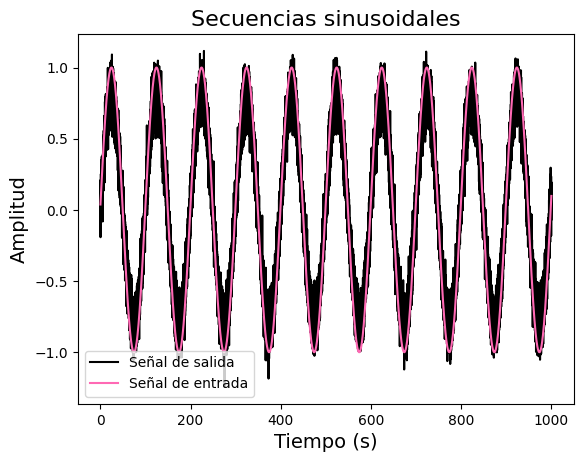

In [ ]:
F0 = 0.01  #frecuencia fundamental
Fs = 25  #frecuencia de muestreo
alfa = 0.8  #atenuación amp
D = 15  #retardo
var = 0.01  #varianza
media = 0  #media del ruido
n = np.arange(0, 1001, 1/Fs)  #tiempo
x_e = np.sin(2*np.pi*F0*(n+15/Fs))  #potencial
w = np.random.normal(media, np.sqrt(var), len(n))   #ruido gaussiano
y_e = alfa*x_e + w  #señal con ruido y retardo

plt.plot(n, y_e, color='black', label='Señal de salida') #señal adquirida
plt.plot(n, x_e, color='#FF69B4', label='Señal de entrada')
plt.legend()
plt.title('Secuencias sinusoidales', fontsize=16)
plt.ylabel('Amplitud', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.show()

*El grafico nos permite observar cómo la señal original sinusoidal se ve afectada por varios fenómenos, primeramente, se evidencia una atenuación en la amplitud de la señal y se observa un retraso temporal de 0.6 segundos, equivalente a 15 muestras que afecta la sincronización temporal de la señal, por último se aprecia la presencia de ruido gaussiano el cual introduce fluctuaciones aleatorias en la señal registrada, este ruido simula el proceso de registro de una señal biológica a través de un sistema electrónico, en general estos efectos combinados distorsionan la señal original, sin embargo, su forma sinusoidal básica sigue siendo reconocible.*

**4.2. Diseño de un filtro**
--

La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y 𝑊𝑛: Frecuencia de corte. Para filtros digitales 𝑊𝑛 está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. 𝑊𝑛 es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.


**Diseñe un filtro FIR pasa bajas para la señal 𝑦𝑒(𝑛), con una frecuencia de corte de 1.25 muestras/s y orden 30.**

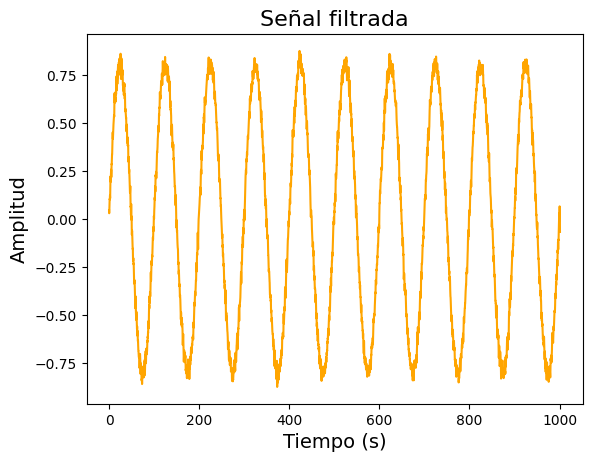

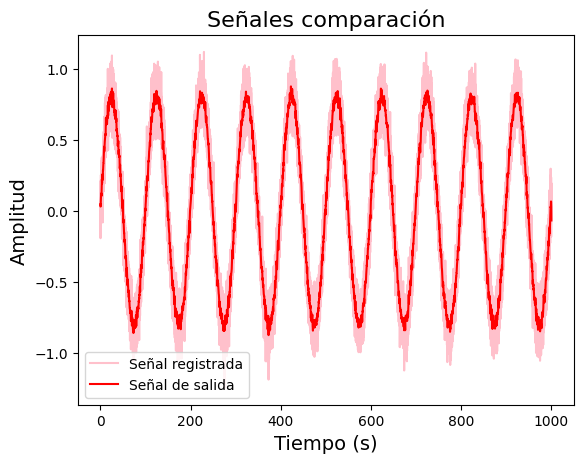

In [ ]:
fc = 1.25 # frecuencia de corte
order = 30 #orden del filtro
nyquist = Fs/2 #frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada

lowpass = signal.firwin(order+1, wn, pass_zero='lowpass', window='hamming') #diseño del filtro
y_f = signal.filtfilt(b=lowpass, a=1, x=y_e) #aplicamos el filtro

plt.plot(n, y_f,color='orange')
plt.title('Señal filtrada', fontsize=16)
plt.ylabel('Amplitud', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.show()

plt.plot(n, y_e, color='pink', label='Señal registrada') #señal registrada
plt.plot(n, y_f,color='red', label='Señal de salida') #señal con filtro
plt.legend()
plt.title('Señales comparación', fontsize=16)
plt.ylabel('Amplitud', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.show()

Para poder visualizar la respuesta en frecuencia de un filtro dado se tiene:

In [ ]:
def mfreqz(b,a,order,nyq_rate = 1):
    w,h = signal.freqz(b,a);
    h_dB = 20 * np.log10 (abs(h));

    plt.figure(figsize=(8,10));
    plt.subplot(311);
    plt.plot((w/max(w))*nyq_rate,abs(h));
    plt.ylabel('Magnitude');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    [xmin, xmax, ymin, ymax] = plt.axis();

    #plt.xlim((40,60))

    plt.grid(True);

    plt.subplot(312);
    plt.plot((w/max(w))*nyq_rate,h_dB);
    plt.ylabel('Magnitude (db)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Frequency response. Order: ' + str(order));
    plt.grid(True)
    plt.grid(True)


    plt.subplot(313);
    h_Phase = np.unwrap(np.arctan2(np.imag(h),np.real(h)));
    plt.plot((w/max(w))*nyq_rate,h_Phase);
    plt.ylabel('Phase (radians)');
    plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)');
    plt.title(r'Phase response. Order: ' + str(order));
    plt.subplots_adjust(hspace=0.5);
    plt.grid(True)
    plt.show()

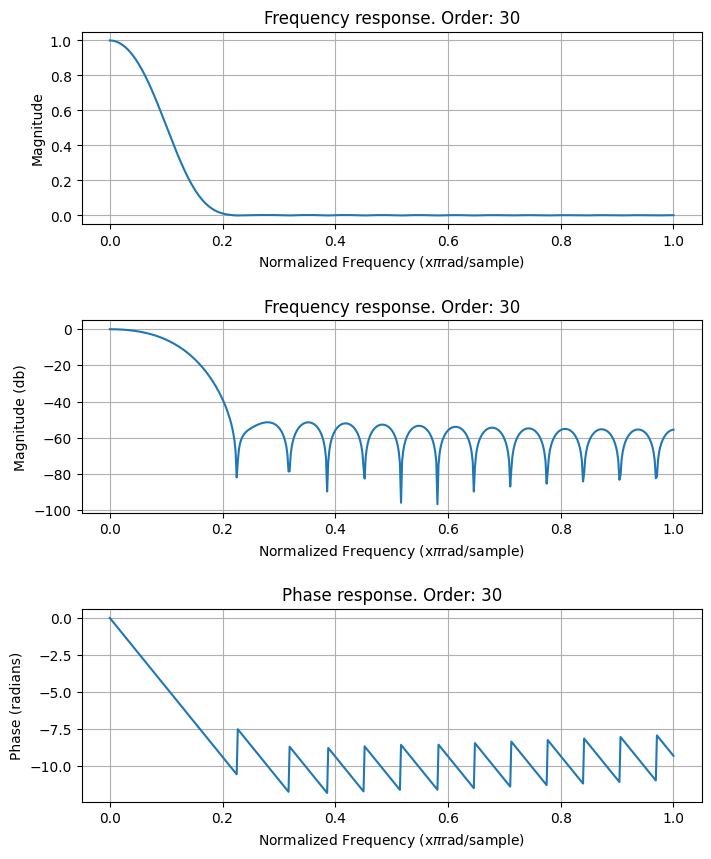

In [ ]:
mfreqz(b=lowpass,a=1,order=order)

*Estas gráficas muestran la respuesta en frecuencia del filtro digital la respuesta de magnitud es la típica de un filtro paso bajo ideal, comienza en 1 y decae gradualmente hacia cero a medida que aumenta la frecuencia normalizada.
La magnitud en decibeles tiene unas ondulaciones periódicas conocidas como rizado en la banda de paso y rechazo, y se puede decir que es común en filtros con espuesta al impulso finita y son causadas por algo llamado efectos de trucamiento.
La grafica inferior representa la respuesta de fase que muestra una transición mas brusca y una forma escalonada lineal, esta forma igualmente es comun en los filtros porque la fase varía linealmente con la frecuencia en la banda de paso y da saltos de π rad en las frecuencias donde la magnitud se anula [1].*

**¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.**


Nota: Resultado esperado diseño de 3 filtros FIR (pasa bajas, pasa altas y pasa banda)

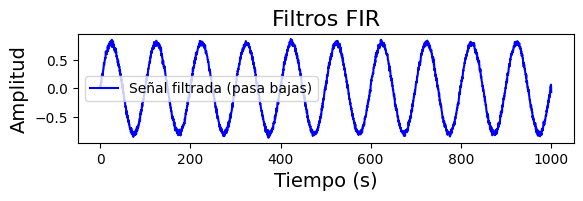

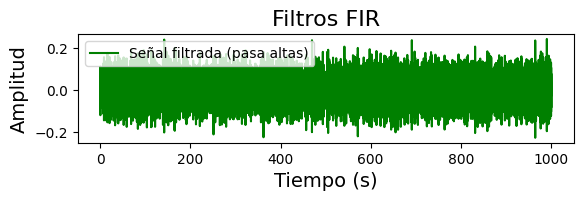

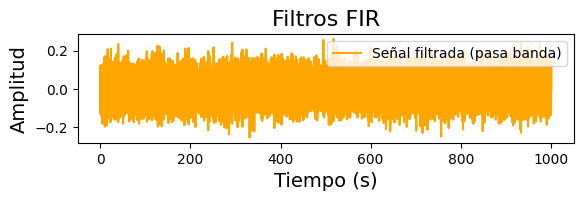

In [ ]:
wn_low = 1.25/nyquist #frecuencia de corte pasa bajas
wn_high = 7.5/nyquist #frecuencia de corte pasa altas

lowpass = signal.firwin(order+1, wn_low, pass_zero='lowpass', window='hamming') #diseño del filtro pasa bajas
highpass = signal.firwin(order+1, wn_high, pass_zero='highpass', window='hamming') #diseño del filtro pasa altas
bandpass = signal.firwin(order+1, [wn_low, wn_high], pass_zero='bandpass', window='hamming') #diseño del filtro pasa banda

#aplicamos los filtros
y_f_low = signal.filtfilt(b=lowpass, a=1, x=y_e)
y_f_high = signal.filtfilt(b=highpass, a=1, x=y_e)
y_f_band = signal.filtfilt(b=bandpass, a=1, x=y_e)

#graficamos
plt.subplot(3,1,1)
plt.plot(n, y_f_low, color='blue', label='Señal filtrada (pasa bajas)')
plt.legend()
plt.title('Filtros FIR', fontsize=16)
plt.ylabel('Amplitud', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.show()
plt.subplot(3,1,2)
plt.plot(n, y_f_high, color='green', label='Señal filtrada (pasa altas)')
plt.legend()
plt.title('Filtros FIR', fontsize=16)
plt.ylabel('Amplitud', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.show()
plt.subplot(3,1,3)
plt.plot(n, y_f_band, color='orange', label='Señal filtrada (pasa banda)')
plt.legend()
plt.title('Filtros FIR', fontsize=16)
plt.ylabel('Amplitud', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.show()

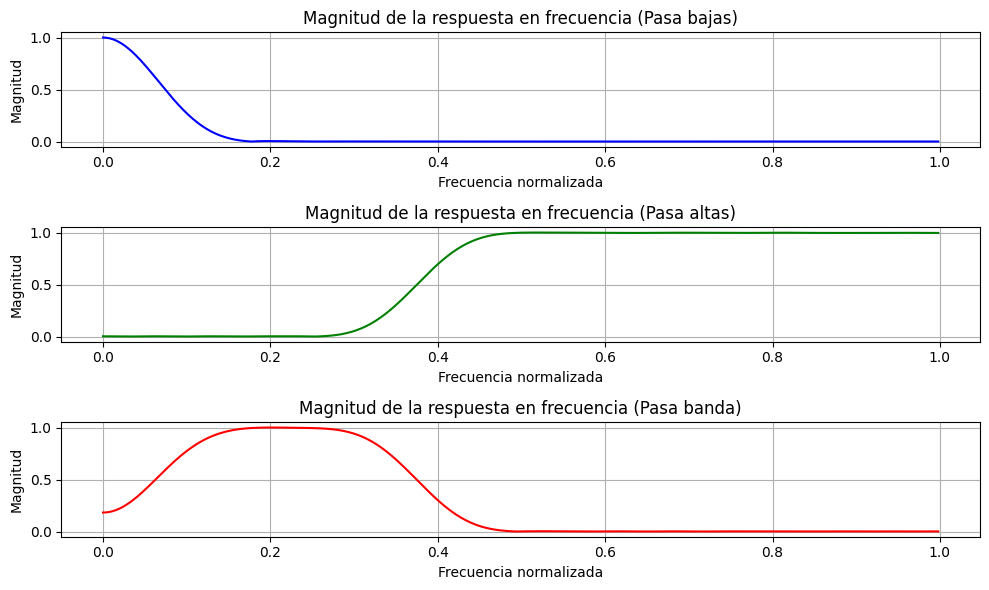

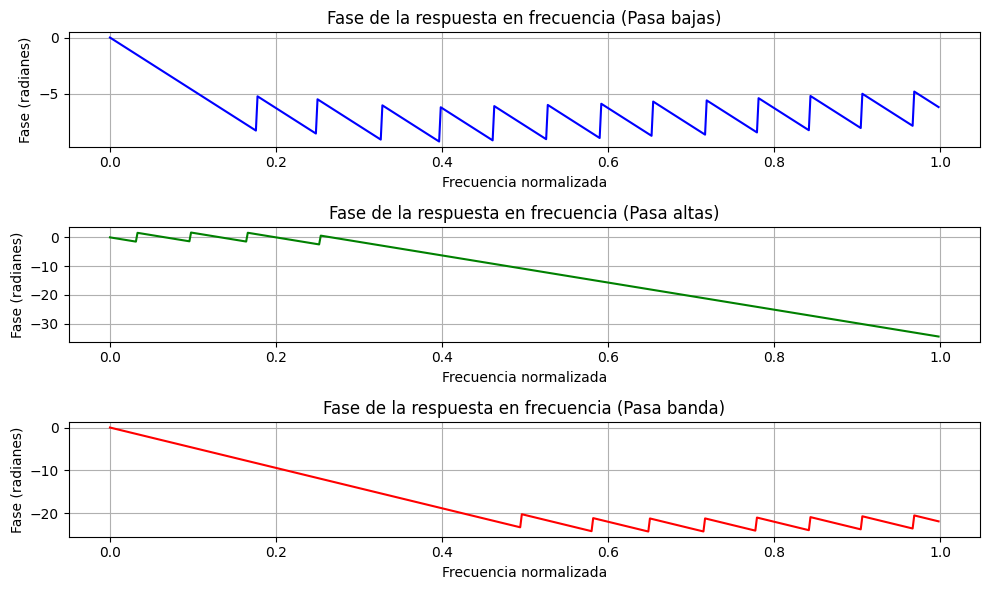

In [ ]:
#respuesta en frecuencia
w, h_low = signal.freqz(lowpass)
w, h_high = signal.freqz(highpass)
w, h_band = signal.freqz(bandpass)
freqs = w / np.pi #frecuencias normalizadas

#graficas de magnitud
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(freqs, np.abs(h_low), 'b')
plt.title('Magnitud de la respuesta en frecuencia (Pasa bajas)')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(freqs, np.abs(h_high), 'g')
plt.title('Magnitud de la respuesta en frecuencia (Pasa altas)')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(freqs, np.abs(h_band), 'r')
plt.title('Magnitud de la respuesta en frecuencia (Pasa banda)')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Magnitud')
plt.grid()
plt.tight_layout()
plt.show()

#graficas de fase
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(freqs, np.unwrap(np.angle(h_low)), 'b')
plt.title('Fase de la respuesta en frecuencia (Pasa bajas)')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Fase (radianes)')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(freqs, np.unwrap(np.angle(h_high)), 'g')
plt.title('Fase de la respuesta en frecuencia (Pasa altas)')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Fase (radianes)')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(freqs, np.unwrap(np.angle(h_band)), 'r')
plt.title('Fase de la respuesta en frecuencia (Pasa banda)')
plt.xlabel('Frecuencia normalizada')
plt.ylabel('Fase (radianes)')
plt.grid()
plt.tight_layout()
plt.show()

*Para implementar el filtro pasa banda y pasa altas utilizando la función **firwin** se deben modificar los argumentos wn y pass_zero, wn especifica la frecuencia de corte normalizada del filtro y pass_zero indica el tipo de filtro a diseñar. Por lo tanto para el caso de el filtro pasa altas se modifico wn a wn_high que corresponde a la frecuencia 7.5 y pass_zero con highpass, para el caso del filtro pasa banda se utiliza pass_zero con bandpass y dos frecuencias de corte normalizadas [wn_low, wn_high]*

*Los filtros pasa bajas, pasa altas y pasa banda tienen como propósito permitir o suprimir determinadas frecuencias de una señal, el pasa bajas deja pasar las frecuencias bajas y atenúa las frecuencias altas, el pasa altas hace lo contrario permitiendo el paso de frecuencias altas y atenuando las bajas y el pasa banda permite el paso de un rango específico de frecuencias eliminando las más bajas como las más altas, por lo que se podria decir que el grafico muestra correctamente el funcionamiento de filtros en nuestra señal biologica, en este contexto los filtros son ampliamente utilizados en el procesamiento de señales para aislar o eliminar componentes de frecuencia específicos, mejorando así la calidad de la señal o extrayendo información relevante para su estudio y evaluacion.*

*Respecto a la **respuesta en frecuencia (los diagramas de bode)** para el caso del filtro pasa baja ya lo habiamos analizado anteriormente.
La grafica del filtro pasa altas tambien presenta una respuesta típica la magnitud es cercana a cero para las frecuencias bajas y aumenta gradualmente hasta alcanzar un valor constante cercano a 1 en las frecuencias altas y para la grafica del magntidu del filtro pasa banda, la magnitud es cercana a cero tanto para las frecuencias bajas como para las altas, mientras que en un rango intermedio de frecuencias es cercana a 1, permitiendo el paso de esas componentes de frecuencia, osea que tambien tiene un comportamiento caracteristico de este tipo de filtro.
igualmente para las respuesta de fase se puede decir que son típicas y esperadas para filtros FIR diseñados como pasa bajas, pasa altas y pasa banda, respectivamente.*

**La función iirfilter permite diseñar un filtro IIR. Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare cambios.**

Nota: Resultado esperado diseño de 3 filtros IIR (pasa bajas, pasa altas y pasa banda)

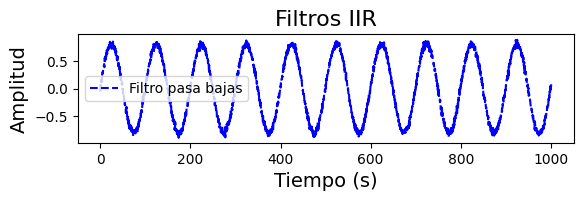

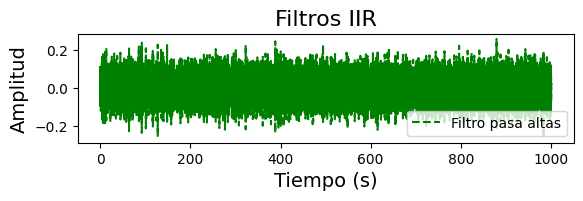

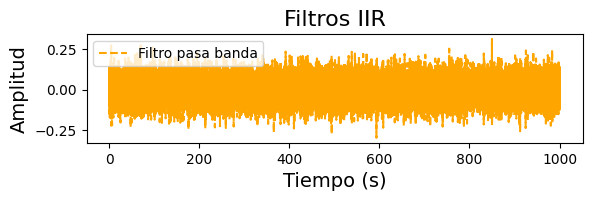

In [ ]:
order = 15 # Orden del filtro IIR
#el orden de un filtro FIR se refiere a la cantidad de coeficientes en la respuesta al impulso, mientras que el orden de un  filtro IIR se refiere al grado de los polinomios en
#la función de transferencia, es por esto que para poder analizar bien la señal le tuvimos que bajar a el numero de orden para poder apreciar mejor las diferencias en las señales de salida

b_low, a_low = signal.iirfilter(order, wn_low, btype='lowpass', analog=False, ftype='butter') #diseño del filtro IIR pasa bajas
b_high, a_high = signal.iirfilter(order, wn_high, btype='highpass', analog=False, ftype='butter') #diseño del filtro IIR pasa altas
b_band, a_band = signal.iirfilter(order, [wn_low, wn_high], btype='bandpass', analog=False, ftype='butter') #diseño del filtro IIR pasa banda

#aplicamos los filtros
y_f_low_iir = signal.filtfilt(b_low, a_low, y_e)
y_f_high_iir = signal.filtfilt(b_high, a_high, y_e)
y_f_band_iir = signal.filtfilt(b_band, a_band, y_e)

#graficamos
plt.subplot(3,1,1)
plt.plot(n, y_f_low_iir, color='blue', linestyle='--', label='Filtro pasa bajas')
plt.title('Filtros IIR', fontsize=16)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.legend()
plt.show()
plt.subplot(3,1,2)
plt.plot(n, y_f_high_iir, color='green', linestyle='--', label='Filtro pasa altas')
plt.title('Filtros IIR', fontsize=16)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.legend()
plt.show()
plt.subplot(3,1,3)
plt.plot(n, y_f_band_iir, color='orange', linestyle='--', label='Filtro pasa banda')
plt.title('Filtros IIR', fontsize=16)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.ylabel('Amplitud', fontsize=14)
plt.legend()
plt.show()

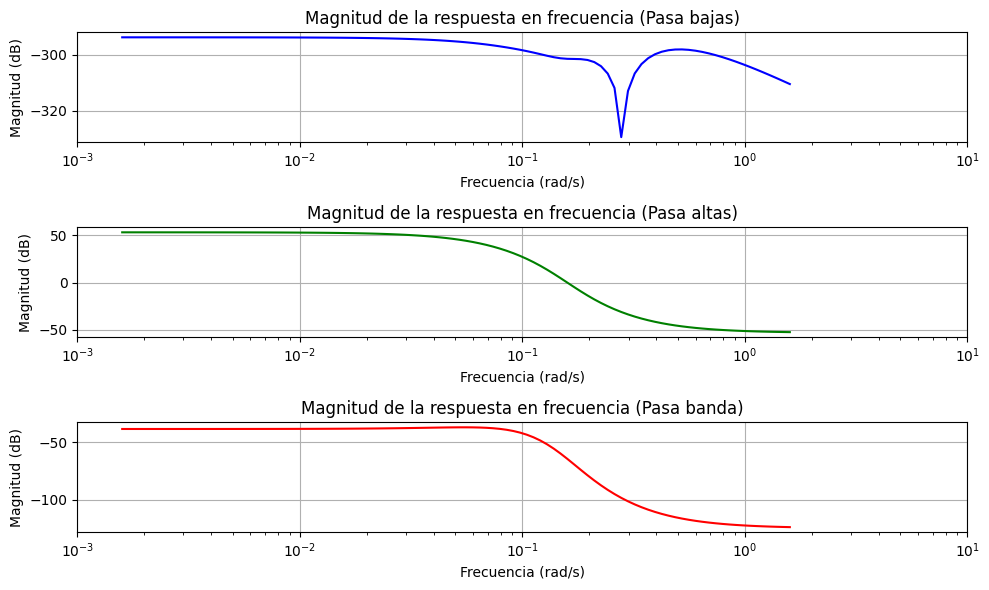

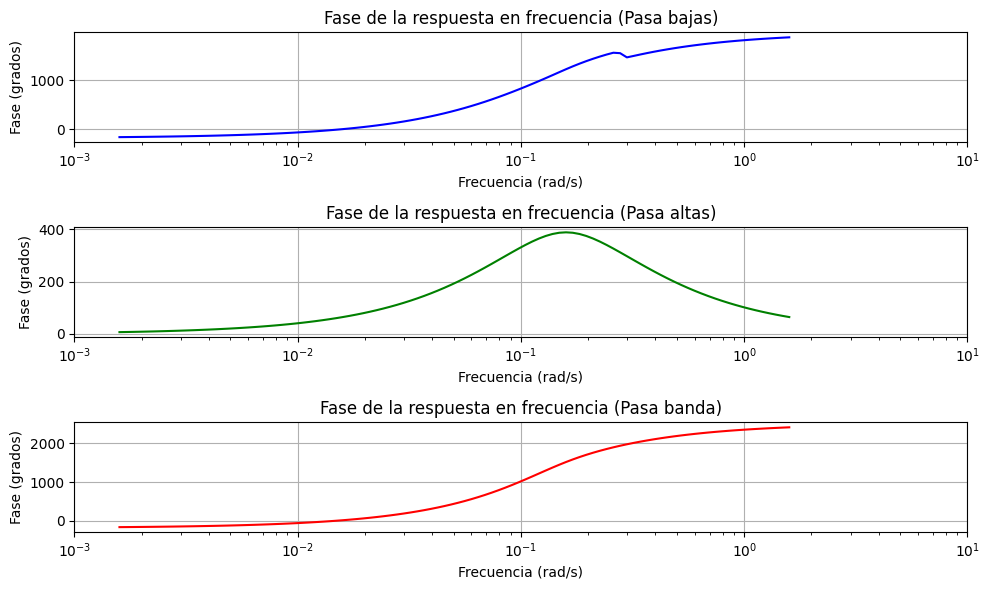

In [ ]:
#instancias de lti
sys_low = signal.lti(b_low, a_low)
sys_high = signal.lti(b_high, a_high)
sys_band = signal.lti(b_band, a_band)

#respuesta en frecuencia
w, mag_low, phase_low = signal.bode(sys_low)
w, mag_high, phase_high = signal.bode(sys_high)
w, mag_band, phase_band = signal.bode(sys_band)

# Graficas de magnitud
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.semilogx(w / (2 * np.pi), mag_low, 'b')
plt.title('Magnitud de la respuesta en frecuencia (Pasa bajas)')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.xlim([10**-3, 10**1])

plt.subplot(3, 1, 2)
plt.semilogx(w / (2 * np.pi), mag_high, 'g')
plt.title('Magnitud de la respuesta en frecuencia (Pasa altas)')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.xlim([10**-3, 10**1])

plt.subplot(3, 1, 3)
plt.semilogx(w / (2 * np.pi), mag_band, 'r')
plt.title('Magnitud de la respuesta en frecuencia (Pasa banda)')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Magnitud (dB)')
plt.grid()
plt.xlim([10**-3, 10**1])
plt.tight_layout()
plt.show()

# Gráficas de fase
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.semilogx(w / (2 * np.pi), phase_low, 'b')
plt.title('Fase de la respuesta en frecuencia (Pasa bajas)')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.grid()
plt.xlim([10**-3, 10**1])

plt.subplot(3, 1, 2)
plt.semilogx(w / (2 * np.pi), phase_high, 'g')
plt.title('Fase de la respuesta en frecuencia (Pasa altas)')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.grid()
plt.xlim([10**-3, 10**1])

plt.subplot(3, 1, 3)
plt.semilogx(w / (2 * np.pi), phase_band, 'r')
plt.title('Fase de la respuesta en frecuencia (Pasa banda)')
plt.xlabel('Frecuencia (rad/s)')
plt.ylabel('Fase (grados)')
plt.grid()
plt.xlim([10**-3, 10**1])
plt.tight_layout()
plt.show()

*Al comparar los efectos de aplicar un filtro FIR y un filtro IIR a la señal podemos observar varias diferencias significativas en la salida de la señal filtrada, la atenuación en el filtro FIR es más pronunciada y constante en comparación con el filtro IIR, que puede presentar una atenuación más suave y variante en función de la frecuencia, aparte de que hay una distorsión y la presencia de huecos en la señal filtrada por el filtro IIR que pueden deberse a la naturaleza de su respuesta en frecuencia, los filtros IIR al ser recursivos pueden presentar resonancias o picos en su respuesta en frecuencia que generan distorsiones y huecos en la señal filtrada, y poor otro lado los filtros FIR al tener una respuesta en frecuencia más controlada y sin resonancias tienden a preservar mejor la forma de onda original de la señal, lo que puede resultar en una menor distorsión y ausencia de huecos en la señal filtrada.*

*Se podria decir que la señal filtrada con el filtro FIR presente una respuesta más nítida y menos distorsionada en comparación con la señal filtrada por el filtro IIR, tambien debemos de tener en cuenta que la presencia de huecos en la señal filtrada por el filtro IIR podria tambien estar relacionada a la ubicación de los polos y ceros en el plano z, que pueden generar cancelaciones o amplificaciones selectivas en ciertas frecuencias afectando la forma de onda de la señal [2].*

*Respecto a la **respuesta en frecuencia** (los diagramas de bode), la gráfica de magnitud del filtro pasa bajas exhibe una característica de máxima planitud en la banda de paso y una caída abrupta en la frecuencia de corte, para el caso de el filtro pasa altas la magnitud tiene una atenuación en las bajas frecuencias y una ganancia constante en las altas frecuencias.
La gráfica de fase del filtro pasa bajas presenta una transición continua dejando un desfase lineal conforme aumenta la frecuencia y para el pasa altas muestra un comportamiento masomenos inverso, tiene unas subidas y bajadas extrañas que tienen que ver con un desfase lineal decreciente a medida que aumenta la frecuencia, en conclusion si podemos observar que hay diferencias en el comportamiento tipico de los dos filtros, pero debemos tener en cuenta que los filtros IIR tienen una respuesta al impulso infinita, lo que permite obtener respuestas más selectivas con un orden menor pero a costa de introducir una especie de distorsión.*

**4.3 Filtrado**
--

Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.


**Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza sólo el numerador? ¿A qué hace referencia el numerador? ¿Evidencia cambios en el uso de las funciones de filtrado? ¿Cómo se puede explicar la falta de coincidencia? ¿Es adecuado el orden del filtro usado? Analice.**

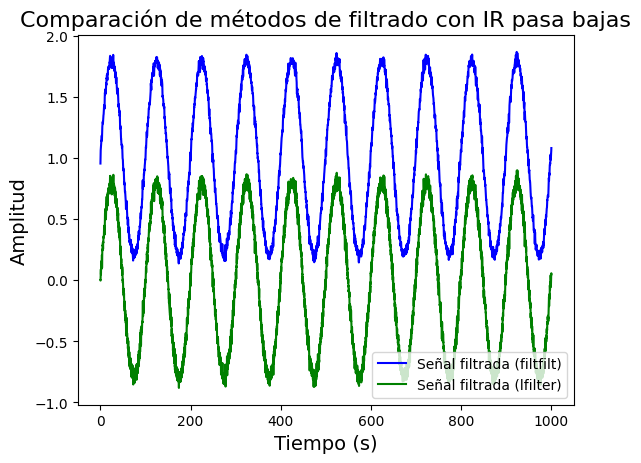

In [ ]:
lowpass = signal.firwin(order+1, wn_low, pass_zero='lowpass', window='hamming') #filtro FIR pasa bajas

y_lfilter = signal.lfilter(lowpass, 1, y_e) #filtrado con lfilter
y_filtfilt = signal.filtfilt(lowpass, 1, y_e) #filtrado con filtfilt

#graficamos
plt.plot(n, y_f_low + 1, color='blue', label='Señal filtrada (filtfilt)') #se suma 1 a señal para desplazarla verticalmente y diferenciar mejor sus diferencias
plt.plot(n, y_lfilter, color='green', label='Señal filtrada (lfilter)')
plt.legend()
plt.title('Comparación de métodos de filtrado con IR pasa bajas', fontsize=16)
plt.ylabel('Amplitud', fontsize=14)
plt.xlabel('Tiempo (s)', fontsize=14)
plt.show()

* **¿Por qué se utiliza sólo el numerador?¿A qué hace referencia el numerador?**
Se utiliza solo el numerador porque se está refiriendo a un filtro de respuesta al impulso finita FIR y la respuesta del filtro se calcula multiplicando los coeficientes del numerador por las muestras de la señal de entrada y sumando los resultados, es decir que el filtro FIR solo tiene coeficientes en el numerador y no en el denominador.

El numero hace referencia a los ceros del sistema como se puede observar en la función del transferencia presente:

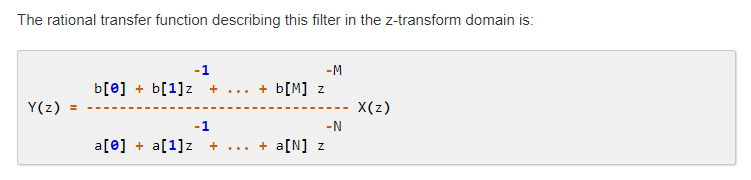


* **¿Cómo se puede explicar la falta de coincidencia?**
puede deberse a las diferencias en la implementación y el diseño de los filtros FIR, el lfilter aplica el filtro de manera causal, lo que puede introducir un retraso en la señal filtrada debido a la naturaleza de la convolución en una sola dirección. Por otro lado filtfilt aplica el filtro de manera bidireccional para eliminar este retraso y lograr una respuesta de fase cero en la señal filtrada, por otro lado, filtfilt aplica el filtro de manera bidireccional lo que significa que aplica el filtro en ambas direcciones para eliminar el retraso introducido por el filtro y lograr una respuesta de fase cero, entonces si miramos al eliminar el retraso y tener una respuesta de fase lineal la señal de salida de filtfilt puede parecer más nítida y menos gruesa en comparación con la señal de salida de lfilter.

* **¿Es adecuado el orden del filtro usado?** El orden del filtro FIR utilizado orden=30 se podria decir que es adecuado ya que proporciona una buena atenuación de las frecuencias no deseadas y una respuesta suave en la banda de paso (sin embargo un orden más alto podría mejorar aún más la selectividad del filtro) [3].



**Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.**

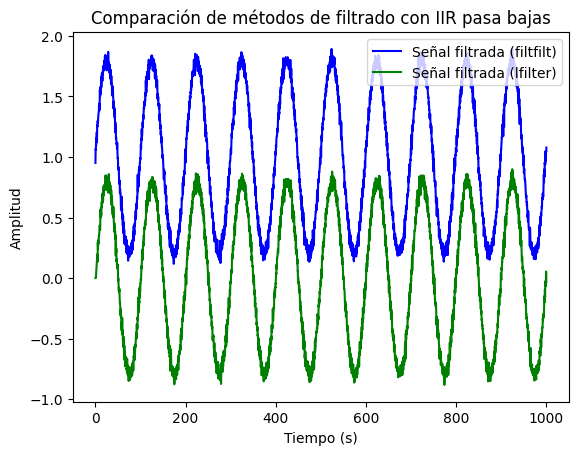

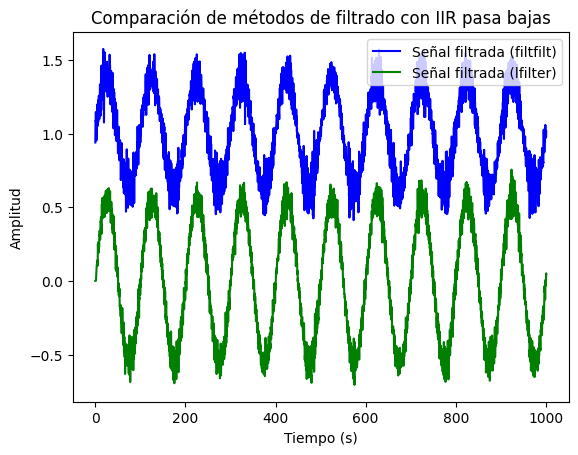

In [ ]:
order = 15 # Orden del filtro IIR
b_low, a_low = signal.iirfilter(order, wn_low, btype='lowpass', analog=False, ftype='butter')  #filtro FIIR pasa bajas
y_lfilter_iir = signal.lfilter(b_low, a_low, y_e)  #filtrado con lfilter
y_filtfilt_iir = signal.filtfilt(b_low, a_low, y_e) #filtrado con filtfilt

#graficamos
plt.plot(n, y_filtfilt_iir + 1, color='blue', label='Señal filtrada (filtfilt)')
plt.plot(n, y_lfilter_iir, color='green', label='Señal filtrada (lfilter)')
plt.legend()
plt.title('Comparación de métodos de filtrado con IIR pasa bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

##------------------------------------------------------------------------------------------------------------------

order = 20 # Orden del filtro IIR
b_low, a_low = signal.iirfilter(order, wn_low, btype='lowpass', analog=False, ftype='butter')  #filtro FIIR pasa bajas
y_lfilter_iir = signal.lfilter(b_low, a_low, y_e)  #filtrado con lfilter
y_filtfilt_iir = signal.filtfilt(b_low, a_low, y_e) #filtrado con filtfilt

#graficamos
plt.plot(n, y_filtfilt_iir + 1, color='blue', label='Señal filtrada (filtfilt)')
plt.plot(n, y_lfilter_iir, color='green', label='Señal filtrada (lfilter)')
plt.legend()
plt.title('Comparación de métodos de filtrado con IIR pasa bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.show()

*¿Por qué se utiliza el numerador y denominador? en este caso porque los dos son importantes, el numerador representa la parte de realimentación directa del filtro, mientras que el denominador representa la retroalimentación de la salida al filtro, al utilizar el numerador y denominador se logra mayor flexibilidad en el filtro y se obtienen respuestas en frecuencia más complejas que con un filtro FIR normal.*

*¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice. segun la literatura un filtro de mayor orden puede proporcionar una mayor selectividad en la frecuencia y se pueden lograr características de filtrado más precisas pero también aumenta la posibilidad de inestabilidades numéricas que segun observamos en este caso concuerda debido a que vemos que está atenuando más las señales de baja frecuencia en comparación con la gráfica superior sin embargo tambien introduce mas oscilaciones a la grafica*


**4.4 Aplicación**
--

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. **Extraiga y trabaje con el canal 1 de la señal.**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = np.loadtxt('/content/drive/MyDrive/Datos/senal_filtros.txt')

Mounted at /content/drive


In [ ]:
canal_1 = data[:, 0]  #asumimos que el canal 1 está en la primera columna
fs = 500 #frecuencia de muestreo
total_samples = len(canal_1) #numero de muestras
duration = total_samples / fs  #duración total de la señal segundos

print("Numero de muestras:", total_samples)
print("Duración total de la señal:", duration)

Numero de muestras: 60000
Duración total de la señal: 120.0


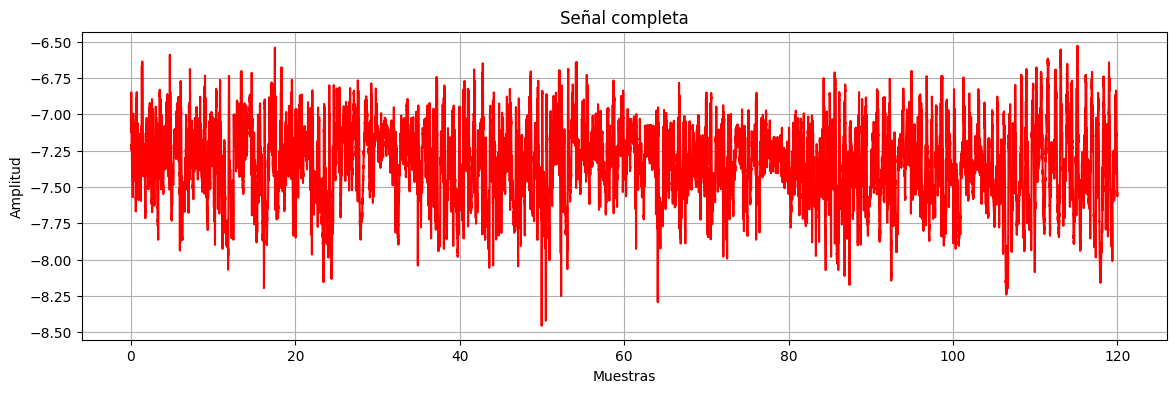

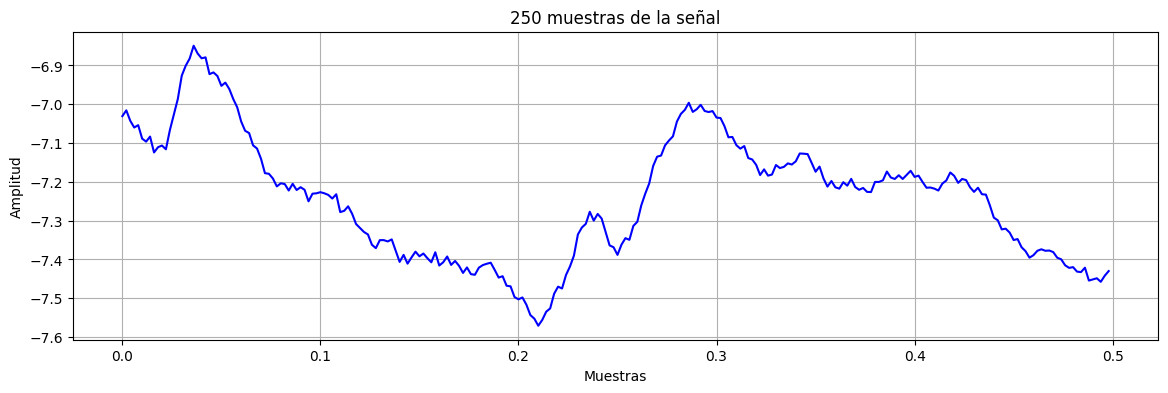

In [ ]:
Fs = 500 #frecuencia de muestreo
nyquist = Fs/2 #frecuencia de Nyquist
n = np.arange(0,len(canal_1)*1/Fs,1/Fs)
plt.figure(figsize=(14,4)) #señal completa
plt.plot(n,canal_1,'r')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('Señal completa')
plt.grid()
plt.show()

#grafica de una ventana con 250 muestras de señal
plt.figure(figsize=(14,4))
plt.plot(n[0:250],canal_1[0:250],'b')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.title('250 muestras de la señal')
plt.grid()
plt.show()

**Realice un análisis frecuencial con la función que permite calcular el periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico?**

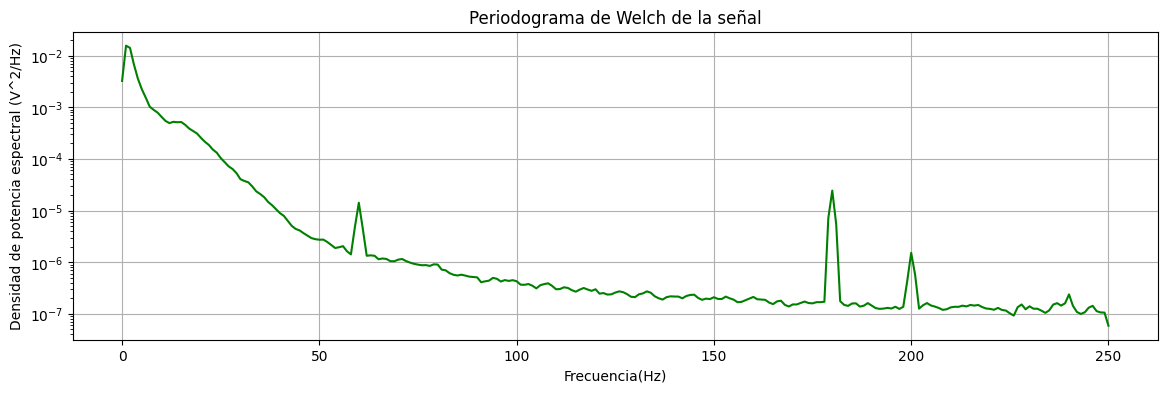

In [ ]:
fw, Canal_den=signal.welch(canal_1, Fs, nperseg=500) #se halla el periodograma de Welch con scipy
fig=plt.figure(figsize=(14,4))
plt.semilogy(fw, Canal_den,'g')
plt.title ('Periodograma de Welch de la señal')
plt.xlabel('Frecuencia(Hz)')
plt.ylabel('Densidad de potencia espectral (V^2/Hz)')
plt.grid()
plt.show()

*Basado en la grafica podemos analizar la presencia de componentes frecuenciales significativos en la señal analizada. se pueden observar picos en la densidad de potencia espectral en las frecuencias comprendidas entre 50 Hz y 60 Hz, lo que corresponde a ruido eléctrico, se podria decir que este ruido es común en señales eléctricas y puede provenir de diversos factores como el uso de equipos electrónicos que generan armónicos de la frecuencia de red. Igualmente la forma general del periodograma muestra una disminución de la densidad espectral a medida que aumenta la frecuencia, lo que es típico de muchas señales reales*

**Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios?**

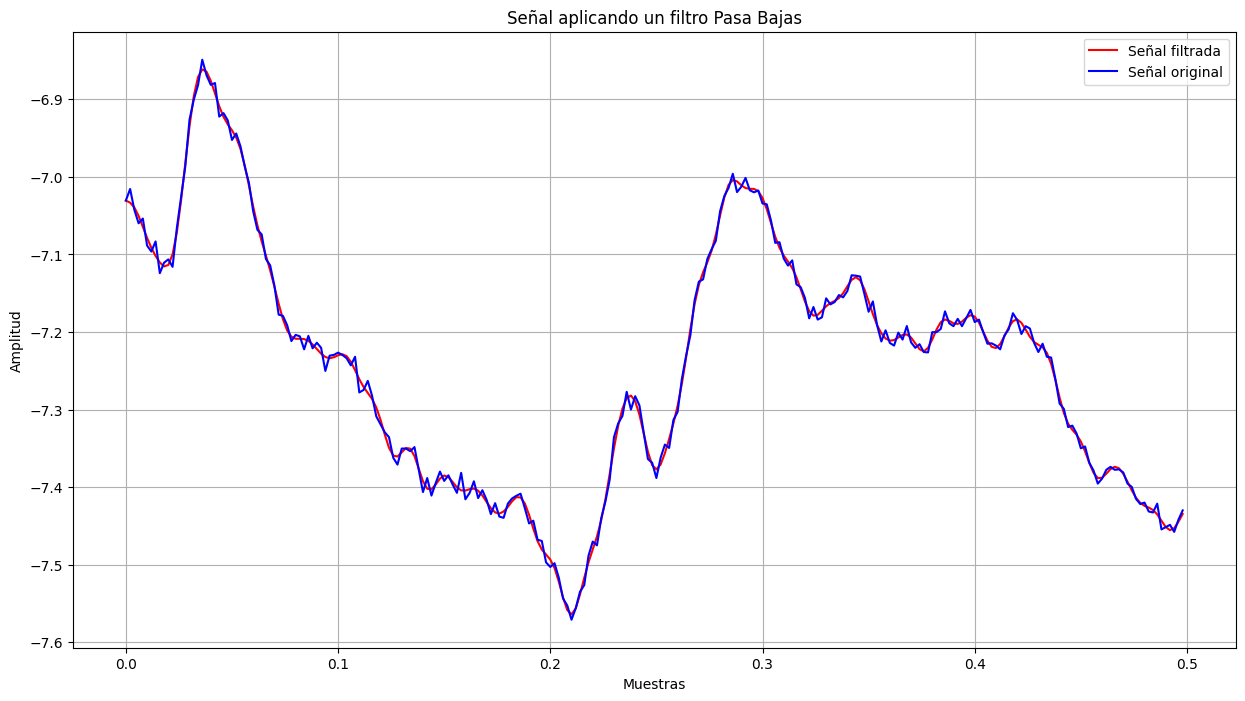

In [ ]:
nyquist=Fs/2
Fc=80;
Wn=Fc/nyquist;
den=1;
N=127;
signal_f=signal.firwin(N,Wn);
x=signal.filtfilt(signal_f,den,canal_1);
fig=plt.figure(figsize=(15,8))
plt.title('Señal aplicando un filtro Pasa Bajas')
plt.plot(n[0:250], x[0:250],'r',label='Señal filtrada')
plt.plot(n[0:250],canal_1[0:250],'b',label='Señal original')
plt.ylabel('Amplitud')
plt.xlabel('Muestras')
plt.legend(loc='best')
plt.grid()
plt.show()

**Grafique un segmento de las señales antes y después de filtrar, analice los cambios.**


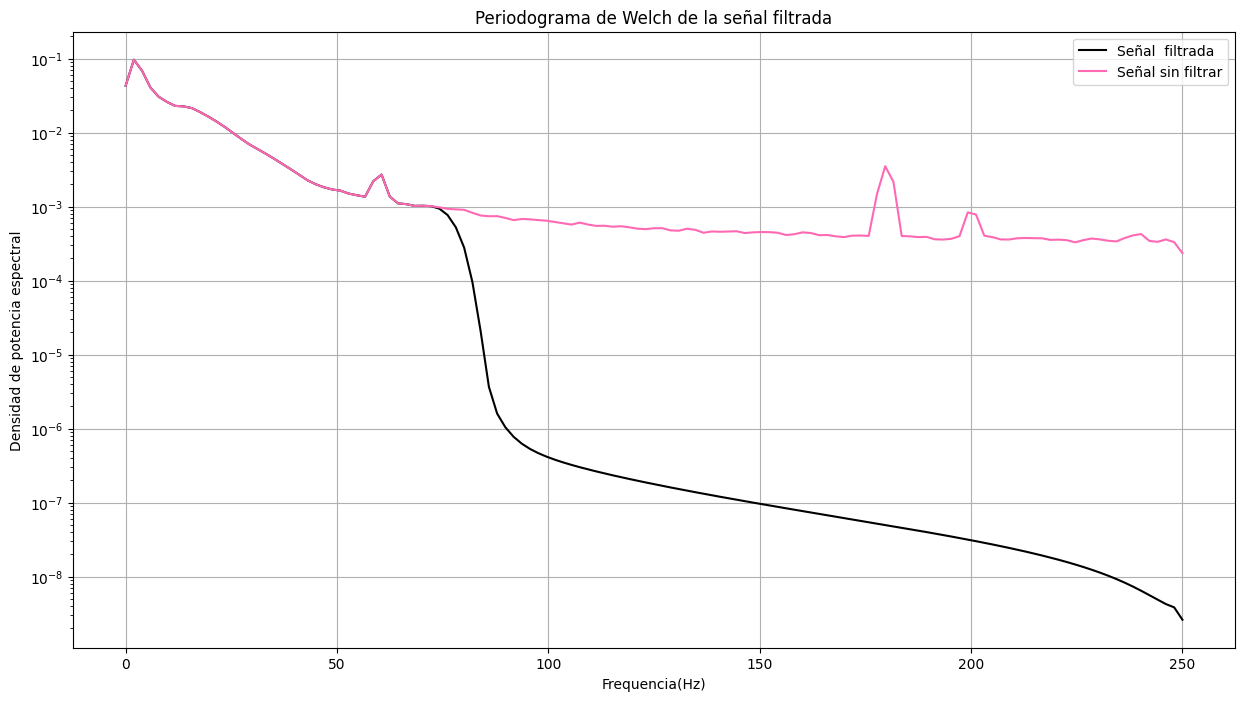

In [ ]:
#analisis en frecuencia de la señal filtrada
fw, Canal_den=signal.welch(x, Fs) #señal sin filtrar
fF, Canal_denF=signal.welch(canal_1, Fs) #señal sin filtrar
fig=plt.figure(figsize=(15,8))
plt.semilogy(fw, np.sqrt(Canal_den),'black', label='Señal  filtrada')
plt.semilogy(fF, np.sqrt(Canal_denF),'#FF69B4', label='Señal sin filtrar')
plt.title ('Periodograma de Welch de la señal filtrada')
plt.xlabel('Frequencia(Hz)')
plt.ylabel('Densidad de potencia espectral')
plt.legend(loc='best')
plt.grid();
plt.show();

*Después de aplicar el filtrado, se aprecian cambios significativos en el comportamiento frecuencial de la señal, el periodograma de la señal filtrada, representado en color negro muestra una notable reducción en la densidad espectral en comparación con la señal original en frecuencias específicas, se logro eliminar el ruido de la red eléctrica, en la señal filtrada no se observan picos dentro del rango de frecuencias de 50 Hz a 60 Hz, también se logro atenuación de la señal a otras frecuencias altas. El orden del filtro que se usó fue útil para filtrar el ruido sin generar pérdida de información.*

# Conclusiones


*  La selección del tipo de filtro y su orden tiene un impacto significativo en la calidad de la señal filtrada. En nuestro estudio, observamos cómo diferentes tipos de filtros (FIR e IIR) afectaron la forma y el contenido espectral de la señal, lo que resalta la importancia de elegir el filtro adecuado para cada aplicación específica.

*   Los coeficientes de los filtros y la manera en que estos son ubicados es de gran importancia, pues dependiendo de esto es la forma en que la función de transferencia de dicho filtro va a efectuar cambios sobre las frecuencias de la señal a limpiar.

* Es posible realizar análisis frecuenciales para la eliminación de ruidos correspondientes a frecuencias conocidas. En general, los filtros implementados en este práctica permiten eliminar ruido con frecuencia puntual, en casos de solapamiento de ruido con información, es necesario el uso de filtros adaptativos rales como el Wavelet.

* A pesar de las ventajas de los filtros digitales, también existen algunas limitaciones y áreas de mejora. Por ejemplo, en nuestro estudio observamos que los filtros FIR pueden ser más susceptibles al ruido en comparación con los filtros IIR, lo que sugiere la necesidad de investigar técnicas de mejora de la robustez del filtro FIR o considerar el uso de filtros híbridos que combinen características de ambos tipos de filtros.

**Bibliografia**
--

[1] Procesado Digital de Bioseñales.(2011). Obtenido de: http://ocw.uv.es/ingenieria-y-arquitectura/1-5/ib_material/IB_T4_OCW.pdf

[2] Dietrich Schlichthärle. Digital Filters Basics and Design Chapter 4.(2011). Obtenido de: https://users.dimi.uniud.it/~antonio.dangelo/MMS/materials/DigitalFilters.pdf

[3] MathWorks. Digital Filter. Obtenido de: https://la.mathworks.com/help/signal/ref/digitalfilter_es.html
